In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import emoji
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
import string
import re  # Regular expressions for parsing the lines

<h3 style="color:blue;"> function to remove emojis from a text, i will use this on usernames with emojis in them</h3>

In [23]:
def remove_emojis(text):
    # Regex pattern to match most emojis in a string
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U0001F1F2-\U0001F1F4"  # Macau SAR China
                           u"\U0001F1E6-\U0001F1FF"  # flags
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F680-\U0001F6FF"
                           u"\u2600-\u26FF\u2700-\u27BF"
                           u"\u2300-\u23FF"
                           u"\U0001F900-\U0001F9FF"
                           u"\U0001FA00-\U0001FA6F"
                           u"\U0001FA70-\U0001FAFF"
                           u"\U00002702-\U000027B0"
                           u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)  # Replace emojis with an empty string


In [24]:
def parse_line(line):
    pattern = re.compile(r"\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] ~\s*(.*?): (.*)")
    match = pattern.match(line)
    if match:
        # Remove emojis from the 'Sender' part of the match
        sender_no_emojis = remove_emojis(match.group(3))
        return {
            'Date': match.group(1),
            'Time': match.group(2),
            'Sender': sender_no_emojis,
            'Message': match.group(4)
        }


In [25]:
file_path = './_chat.txt'
# Initialize a list to store parsed data
parsed_data = []

# Open and read the file
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parsed_line = parse_line(line)
        if parsed_line:  # If the line is successfully parsed
            parsed_data.append(parsed_line)

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(parsed_data)

# Convert 'Date' to datetime format for easier analysis
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [26]:
df.head(10)

,Date,Time,Sender,Message
0,2020-06-09,19:03:25,Cliff Richard Wanjau,‎~ Cliff Richard Wanjau created this group
1,2023-02-07,12:52:05,Trail Blazer,"Hello, does anyone know of a good place i can ..."
2,2023-02-07,12:53:01,Nekesa,Very urgent.
3,2023-02-07,12:59:58,Iqra,Hana mahali ya kulala manze😂
4,2023-02-07,13:15:53,~Achieng,‎~ ~Achieng 😊 joined using this group's invite...
5,2023-02-07,13:12:44,Nekesa,🤣🤣🤣🤣💦💦💦💦💦
6,2023-02-07,13:16:44,£d₩@rd,Halfords
7,2023-02-07,13:34:08,Arap Chebochok,"Please anyone in Dorset college Dublin, please..."
8,2023-02-07,13:50:20,New Era,"Check in Google maps, bike repair shops, they ..."
9,2023-02-07,13:51:16,Jc,Check adverts find a cheap enough one on it


<h3 style="color: blue;">checking the number of messages deleted from the group from 7th Feb 2023 to 20th Feb 2024</h3>


In [27]:
# Create a mask to identify rows where the message contains "this message was deleted" (case-insensitive)
mask = df['Message'].str.lower().str.strip().str.contains("this message was deleted", na=False)

# Use the mask to filter the DataFrame and select only the 'Message' column
deleted_messages = df.loc[mask, 'Message']

# Display the filtered 'Message' column
deleted_msgs = len(deleted_messages)
total_msgs = len(df)

print(f"Total messages deleted were {deleted_msgs} from a total of {total_msgs} messages sent in the group from 7th Feb 2023 to 12th Feb 2024")

Total messages deleted were 339 from a total of 7125 messages sent in the group from 7th Feb 2023 to 12th Feb 2024


<h3 style="color: blue;">now we remove columns that contain deleted messages</h3>

In [28]:
# Invert the mask to select rows that do NOT contain "this message was deleted"
inverse_mask = ~mask

# Apply the mask to the DataFrame to filter out unwanted rows
filtered_df = df[inverse_mask]

# Reset the index of the filtered DataFrame
filtered_df.reset_index(drop=True, inplace=True)




<h3 style="color: blue;"> Getting all messages by specific User </h3>

In [31]:
# Filter for messages from 'Chebet'
userData_df = filtered_df[filtered_df['Sender'] == 'NK']

# Print each message from 'Chebet', ensuring deleted messages are excluded
for index, row in userData_df.iterrows():
    print(f"Date: {row['Date']}, Time: {row['Time']}, Message: {row['Message']}\n")

Date: 2023-10-26 00:00:00, Time: 08:29:55, Message: ‎~ NK joined using this group's invite link

Date: 2023-10-28 00:00:00, Time: 13:09:19, Message: LinkedIn too

Date: 2023-11-18 00:00:00, Time: 11:50:13, Message: Try Mpesa they have a Visa card and you can use to load any credit card or just use it as is

Date: 2024-01-14 00:00:00, Time: 21:09:46, Message: Hi, does anyone know where/how I can watch afcon? Streaming online other than supersport

Date: 2024-01-14 00:00:00, Time: 21:11:55, Message: Thanks

Date: 2024-02-11 00:00:00, Time: 22:33:56, Message: Are you guys serious

Date: 2024-02-11 00:00:00, Time: 22:34:01, Message: Oh no

Date: 2024-02-12 00:00:00, Time: 13:48:06, Message: Which EU countries can one transit through to kenya without needing a transit visa

Date: 2024-02-14 00:00:00, Time: 08:13:20, Message: It's like a bad nightmare, rest easy Bridgit

Date: 2024-02-15 00:00:00, Time: 13:26:06, Message: Economical it will go down and if it comes back it will be very slight

<h3 style="color: blue;"> Number of messages deleted by each admin

In [32]:
mask = df['Message'].str.contains("by admin", case=False, na=False)
adminDeleted_df = df[mask]
# Regular expression to capture text following "by admin ~"
pattern = "by admin ~\s*(.+)"
adminDeleted_df['Admin'] = adminDeleted_df['Message'].str.extract(pattern, expand=False)
# Count the number of messages deleted by each admin
deletions_by_admin = adminDeleted_df['Admin'].value_counts()
print(deletions_by_admin)



Admin
Jeff Otengo.    19
Yvonne.         10
ngugi~ian.       3
Aisha.           3
Name: count, dtype: int64


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Torey\AppData\Local\Temp\ipykernel_4604\3031924840.py:4: SyntaxWarning: invalid escape sequence '\s'
  pattern = "by admin ~\s*(.+)"
C:\Users\Torey\AppData\Local\Temp\ipykernel_4604\3031924840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adminDeleted_df['Admin'] = adminDeleted_df['Message'].str.extract(pattern, expand=False)


<h3 style="color: blue;"> PLotting a graph to show the message deleted by each admin 

Admin
Jeff Otengo.    19
Yvonne.         10
ngugi~ian.       3
Aisha.           3
Name: count, dtype: int64


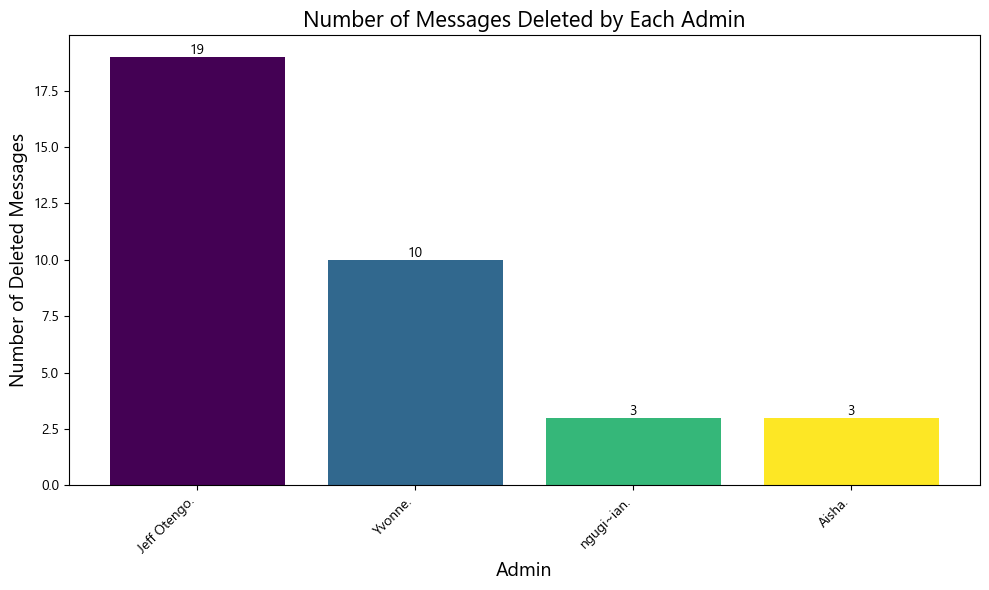

In [33]:

# Ensure 'deletions_by_admin' is a Series with admin names as the index and deletion counts as the values.
print(deletions_by_admin)

# Generate a color palette with a unique color for each admin
colors = plt.cm.viridis(np.linspace(0, 1, len(deletions_by_admin)))

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.bar(deletions_by_admin.index, deletions_by_admin.values, color=colors)

# Adding graph title and labels
plt.title('Number of Messages Deleted by Each Admin', fontsize=16)
plt.xlabel('Admin', fontsize=14)
plt.ylabel('Number of Deleted Messages', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Optionally, add value labels on top of each bar
for i, value in enumerate(deletions_by_admin.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [34]:
top_5_admin_del_senders = adminDeleted_df['Sender'].value_counts().head(3)
print(top_5_admin_del_senders)

Sender
Sir Herbu                         8
Sally                             8
Early Childhood education Jobs    3
Name: count, dtype: int64


<h3 style="color: blue;"> showing graph for users with the most deleted messages by admin

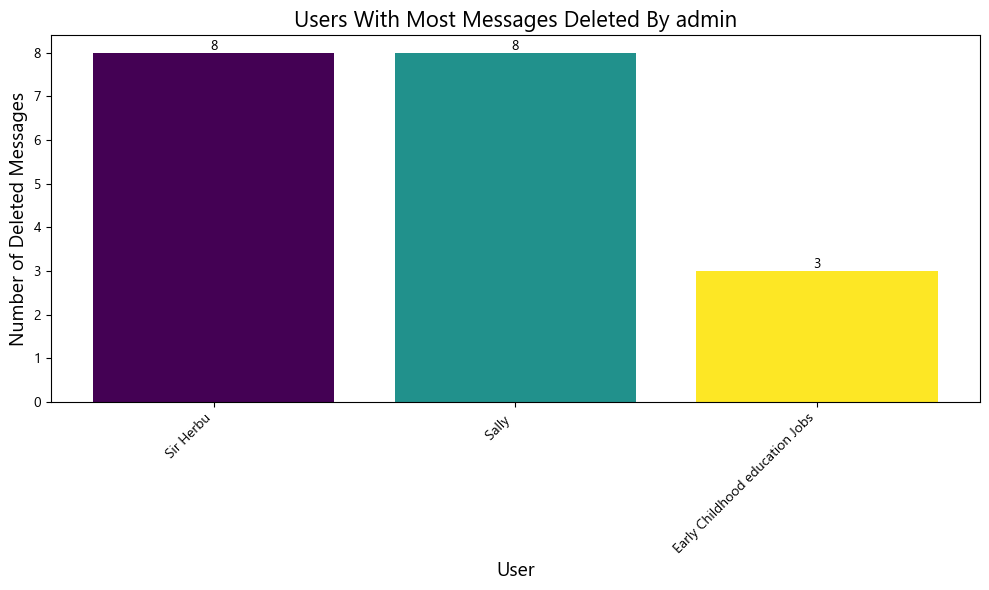

In [35]:



# Generate a color palette with a unique color for each sender
colors = plt.cm.viridis(np.linspace(0, 1, len(top_5_admin_del_senders)))

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.bar(top_5_admin_del_senders.index, top_5_admin_del_senders.values, color=colors)

# Adding graph title and labels
plt.title('Users With Most Messages Deleted By admin', fontsize=16)
plt.xlabel('User', fontsize=14)
plt.ylabel('Number of Deleted Messages', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Optionally, add value labels on top of each bar
for i, value in enumerate(top_5_admin_del_senders.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


<h3 style="color: blue;"> total messages exchanged in the group by month

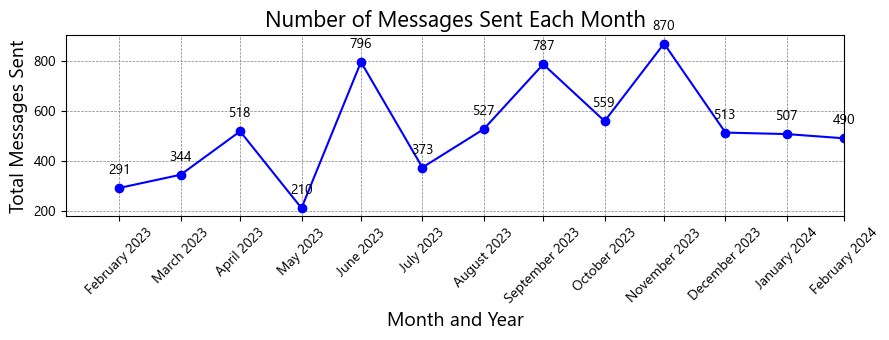

In [36]:
start_date = '2023-02-01'
total_msgs_df = filtered_df[filtered_df['Date'] >= pd.to_datetime(start_date)]
# Group messages by month and year, then count the number of messages in each group
messages_per_month = total_msgs_df.groupby(pd.Grouper(key='Date', freq='M')).size()
plt.figure(figsize=(9, 3.5))
plt.plot(messages_per_month.index,messages_per_month.values,marker='o', linestyle='-', color='b')

# Customize the major grid
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Customize the minor grid
# plt.minorticks_on()
# plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)


# Set x-axis limit to not exceed the last date in your DataFrame
plt.xlim(pd.to_datetime(start_date), total_msgs_df['Date'].max() + pd.offsets.MonthEnd(0))

# adding title and x,y labels

plt.title("Number of Messages Sent Each Month", fontsize=16)
plt.xlabel("Month and Year", fontsize=14)
plt.ylabel("Total Messages Sent", fontsize=14)

# Set the x-axis major ticks to the dates where data points exist
# plt.gca().set_xticks(messages_per_month.index)
# Formatting the x-axis to show month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())


# Annotating each dot with the total number of messages
for i, total in enumerate(messages_per_month.values):
    plt.annotate(str(total), # text to display
                 (messages_per_month.index[i], messages_per_month.values[i]), # point to annotate
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Create custom tick labels
tick_labels = [date.strftime('%B %Y') for date in messages_per_month.index]

# Set the custom tick labels
plt.xticks(messages_per_month.index, tick_labels, rotation=45)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

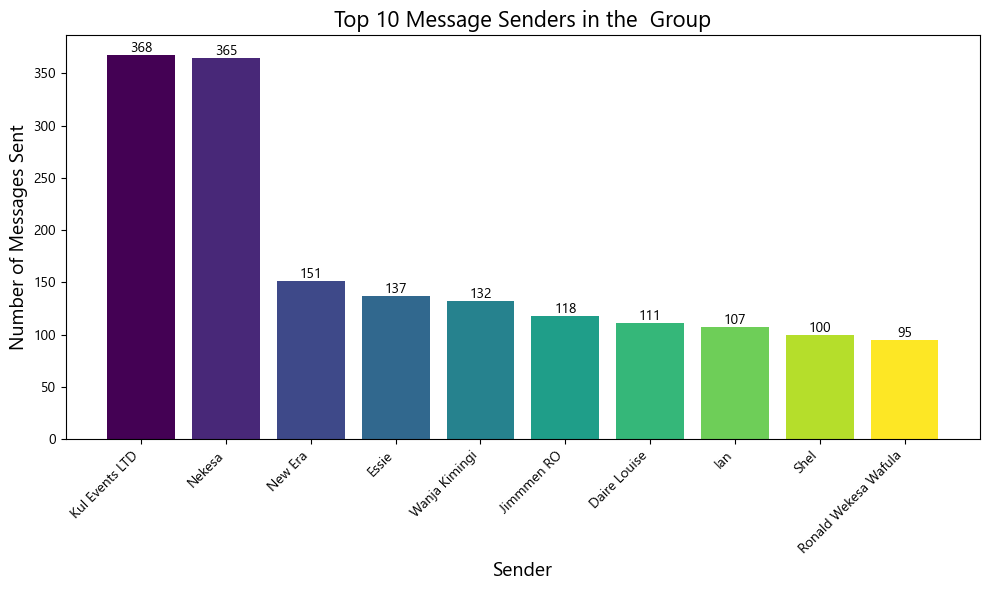

In [37]:
top_10_senders = filtered_df['Sender'].value_counts().head(10)



# Assuming df is your DataFrame and 'Sender' is the column with the sender's name
# Calculate the top 10 senders
top_senders = filtered_df['Sender'].value_counts().head(10).reset_index()
top_senders.columns = ['Sender', 'Messages']
# Create a figure and a bar plot using Matplotlib
plt.figure(figsize=(10, 6))

# Generate a color palette with a unique color for each sender
colors = plt.cm.viridis(np.linspace(0, 1, len(top_senders)))

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.bar(top_senders['Sender'], top_senders['Messages'], color=colors)

# Adding graph title and labels
plt.title('Top 10 Message Senders in the  Group', fontsize=16)
plt.xlabel('Sender', fontsize=14)
plt.ylabel('Number of Messages Sent', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Optionally, add value labels on top of each bar
for i, value in enumerate(top_senders['Messages']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

<h3 style="color: blue;"> understanding the use of Emojis in the Chats

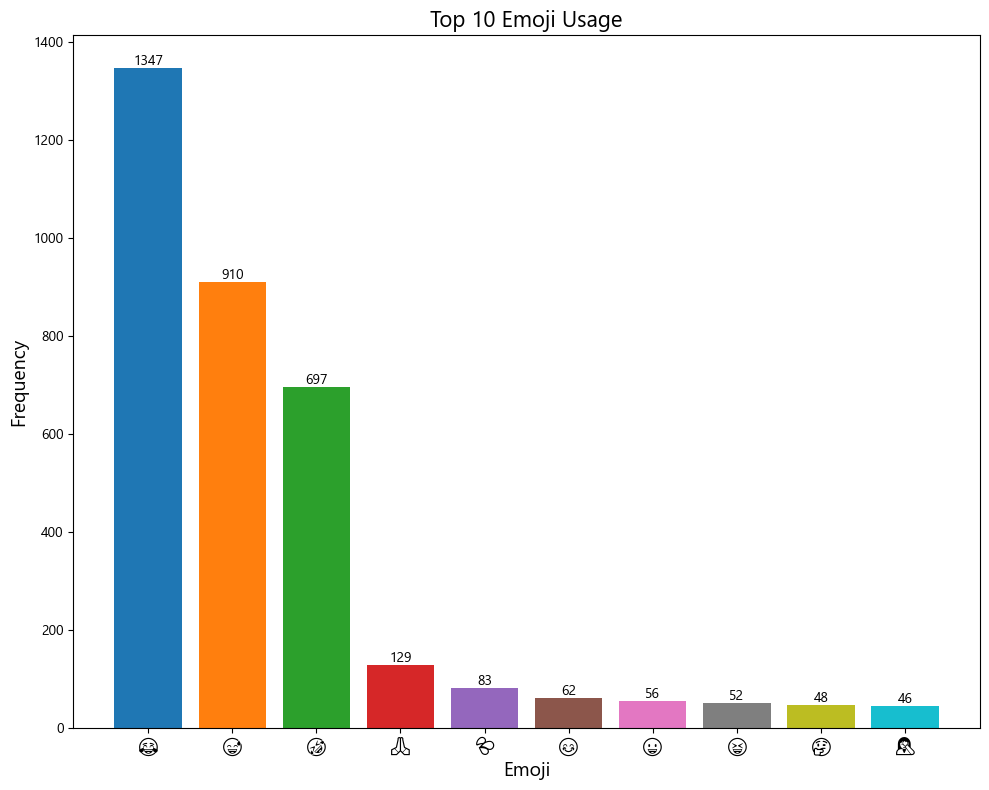

In [38]:

# Assuming 'df' is your DataFrame and 'Message' is the column containing the text messages
# Define a function to extract all emojis from a text
def extract_emojis(text):
    skin_tone_modifiers = '[\U0001F3FB-\U0001F3FF]'
    # Remove skin tone modifiers
    text_without_skin_tones = re.sub(skin_tone_modifiers, '', text)
    return [char for char in text_without_skin_tones if char in emoji.EMOJI_DATA and char not in ['♂', '♀']]

# Apply the function to each message and sum up the lists
all_emojis = sum(filtered_df['Message'].apply(extract_emojis).tolist(), [])

# Count the frequency of each emoji
emoji_freq = Counter(all_emojis)

# Convert the counter to a DataFrame for easy handling and display
emoji_freq_df = pd.DataFrame(emoji_freq.items(), columns=['Emoji', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Ensure emoji_freq_df contains the top 10 most frequent emojis
emoji_freq_df = emoji_freq_df.head(10)

# Generate a color palette with a unique color for each emoji
colors = plt.cm.tab10(np.linspace(0, 1, len(emoji_freq_df)))
plt.rcParams['font.family'] = 'Segoe UI Emoji'
# Plotting the bar graph
plt.figure(figsize=(10, 8))
bars = plt.bar(np.arange(len(emoji_freq_df)), emoji_freq_df['Frequency'], color=colors)

# Adding the emoji as x-tick labels with their Unicode codes
plt.xticks(np.arange(len(emoji_freq_df)), emoji_freq_df['Emoji'], fontsize=12)



# Adding frequency labels on top of each bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Top 10 Emoji Usage', fontsize=16)
plt.xlabel('Emoji', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()


<h3 style="color: blue;"> Frequently Used Words Represented In a WordCloud

C:\Users\Torey\AppData\Local\Temp\ipykernel_4604\618846518.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cleaned_Message'] = filtered_df['Message'].apply(clean_text)


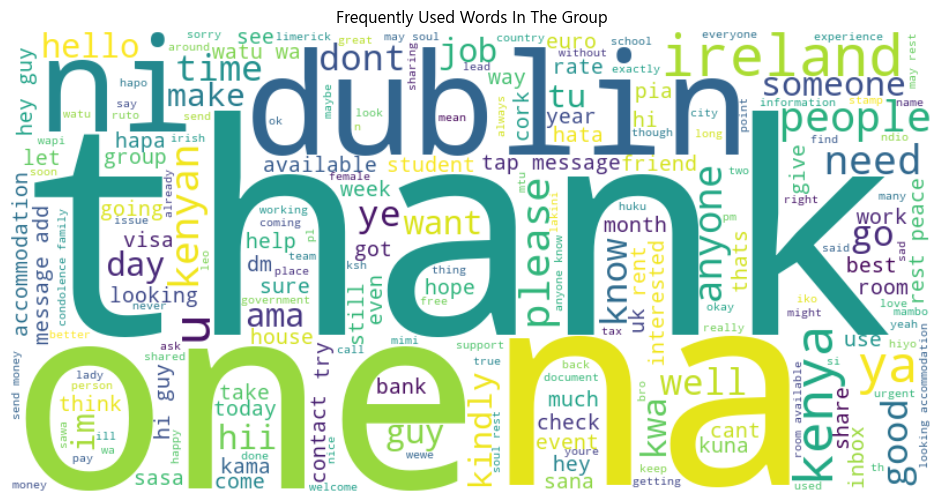

In [39]:

# Additional custom stopwords
custom_stopwords = ['invite', 'link', 'using', 'here','groups','new','number','joined','changed','phone','number']

# Combine custom stopwords with NLTK English stopwords
all_stopwords = set(stopwords.words('english') + custom_stopwords)

# Define a function to clean and tokenize the text
def clean_text(text):
    # Remove emojis
    text = ''.join(char for char in text if char not in emoji.EMOJI_DATA)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in all_stopwords]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Clean and tokenize the text in the 'Message' column
filtered_df['Cleaned_Message'] = filtered_df['Message'].apply(clean_text)

# Concatenate all cleaned messages into a single string
cleaned_text = ' '.join(filtered_df['Cleaned_Message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequently Used Words In The Group')
plt.show()


<h3 style="color: blue;"> The Usage of English Words

In [40]:
# Get the English word list
english_words = set(words.words())


def detect_english_words(text):
    # Tokenize the text into words
    words_list = text.split()
    
    # Initialize a list to store detected English words
    english_words_detected = []
    non_english_words_detected = []
    # Check each word if it's in the English word list
    for word in words_list:
        if word.lower() in english_words:
            english_words_detected.append(word)
        else:
            non_english_words_detected.append(word)
    
    return english_words_detected, non_english_words_detected
    
    


# Detect English words in the text
english_words_detected, non_english_words_detected = detect_english_words(cleaned_text)
# Calculate the total number of words in the text
total_words = len(cleaned_text.split())

# Calculate the number of English words detected
english_words_count = len(english_words_detected)

# Calculate the percentage of English words
english_percentage = (english_words_count / total_words) * 100

# Calculate the percentage of non-English words
non_english_percentage = 100 - english_percentage

# Round off the percentages to 2 decimal places
english_percentage = round(english_percentage, 2)
non_english_percentage = round(non_english_percentage, 2)


# Add the percentage sign
english_percentage_str = f"{english_percentage}%"
non_english_percentage_str = f"{non_english_percentage}%"

print("Percentage of English words:", english_percentage_str)
print("Percentage of non-English words:", non_english_percentage_str)



Percentage of English words: 67.27%
Percentage of non-English words: 32.73%
